In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 8s 0us/step


In [24]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


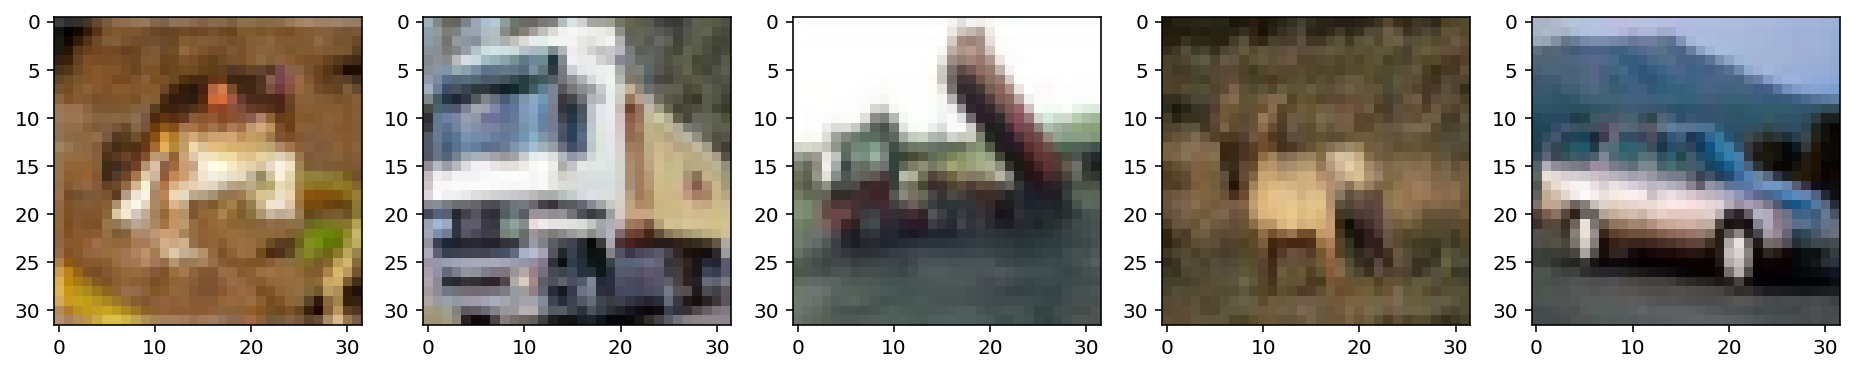

In [25]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [26]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\Matthew\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [34]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 8s - loss: 1.8295 - accuracy: 0.3383 - val_loss: 1.7059 - val_accuracy: 0.3913 - 8s/epoch - 7ms/step
Epoch 2/15
1250/1250 - 7s - loss: 1.6597 - accuracy: 0.4044 - val_loss: 1.6267 - val_accuracy: 0.4211 - 7s/epoch - 6ms/step
Epoch 3/15
1250/1250 - 7s - loss: 1.5861 - accuracy: 0.4309 - val_loss: 1.6023 - val_accuracy: 0.4282 - 7s/epoch - 6ms/step
Epoch 4/15
1250/1250 - 8s - loss: 1.5417 - accuracy: 0.4466 - val_loss: 1.5738 - val_accuracy: 0.4449 - 8s/epoch - 6ms/step
Epoch 5/15
1250/1250 - 8s - loss: 1.5105 - accuracy: 0.4585 - val_loss: 1.5699 - val_accuracy: 0.4371 - 8s/epoch - 6ms/step
Epoch 6/15
1250/1250 - 8s - loss: 1.4826 - accuracy: 0.4678 - val_loss: 1.5322 - val_accuracy: 0.4580 - 8s/epoch - 6ms/step
Epoch 7/15
1250/1250 - 9s - loss: 1.4584 - accuracy: 0.4791 - val_loss: 1.5340 - val_accuracy: 0.4513 - 9s/epoch - 7ms/step
Epoch 8/15
1250/1250 - 9s - loss: 1.4366 - accuracy: 0.4827 - val_loss: 1.5809 - val_accuracy: 0.4372 - 9s/epoch - 7ms/step
Epoch 9/

In [35]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

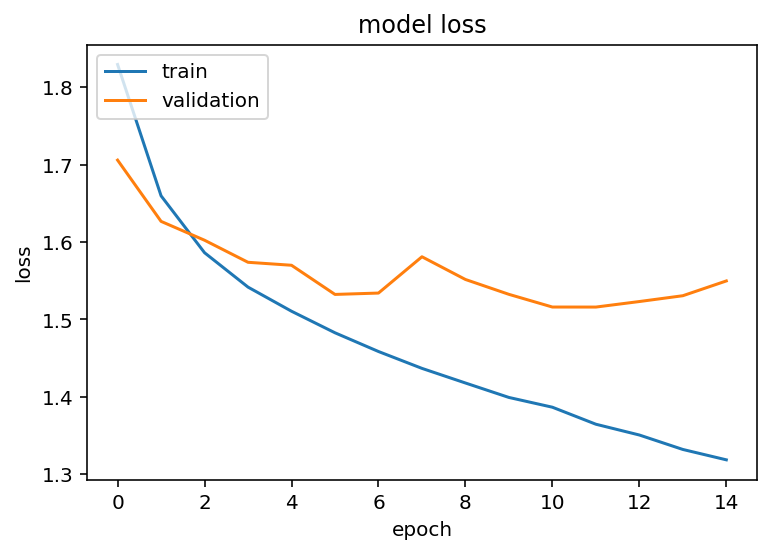

In [36]:
plotLosses(history)

In [37]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [38]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 10)
Shape of test data:
(10000, 32, 32, 3)
(10000, 10)


In [39]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [40]:
history = model.fit(X_train, y_train, batch_size=512, epochs=200, verbose=2, validation_split=0.2)


Epoch 1/200
79/79 - 56s - loss: 2.0414 - accuracy: 0.2728 - val_loss: 1.9941 - val_accuracy: 0.3225 - 56s/epoch - 705ms/step
Epoch 2/200
79/79 - 54s - loss: 1.7215 - accuracy: 0.3985 - val_loss: 1.9159 - val_accuracy: 0.3218 - 54s/epoch - 680ms/step
Epoch 3/200
79/79 - 52s - loss: 1.5448 - accuracy: 0.4545 - val_loss: 1.5794 - val_accuracy: 0.4287 - 52s/epoch - 664ms/step
Epoch 4/200
79/79 - 55s - loss: 1.4157 - accuracy: 0.4992 - val_loss: 1.4893 - val_accuracy: 0.4669 - 55s/epoch - 691ms/step
Epoch 5/200
79/79 - 49s - loss: 1.3209 - accuracy: 0.5333 - val_loss: 1.3812 - val_accuracy: 0.5078 - 49s/epoch - 625ms/step
Epoch 6/200
79/79 - 50s - loss: 1.2450 - accuracy: 0.5620 - val_loss: 1.3953 - val_accuracy: 0.5143 - 50s/epoch - 631ms/step
Epoch 7/200
79/79 - 49s - loss: 1.1734 - accuracy: 0.5905 - val_loss: 1.3115 - val_accuracy: 0.5449 - 49s/epoch - 621ms/step
Epoch 8/200
79/79 - 51s - loss: 1.1038 - accuracy: 0.6141 - val_loss: 1.2704 - val_accuracy: 0.5535 - 51s/epoch - 647ms/step


79/79 - 52s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.6901 - val_accuracy: 0.6395 - 52s/epoch - 652ms/step
Epoch 67/200
79/79 - 50s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.6982 - val_accuracy: 0.6391 - 50s/epoch - 630ms/step
Epoch 68/200
79/79 - 50s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.7071 - val_accuracy: 0.6399 - 50s/epoch - 635ms/step
Epoch 69/200
79/79 - 51s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.7168 - val_accuracy: 0.6401 - 51s/epoch - 644ms/step
Epoch 70/200
79/79 - 51s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.7226 - val_accuracy: 0.6391 - 51s/epoch - 641ms/step
Epoch 71/200
79/79 - 52s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.7319 - val_accuracy: 0.6395 - 52s/epoch - 658ms/step
Epoch 72/200
79/79 - 51s - loss: 9.8598e-04 - accuracy: 1.0000 - val_loss: 2.7401 - val_accuracy: 0.6387 - 51s/epoch - 642ms/step
Epoch 73/200
79/79 - 51s - loss: 9.6591e-04 - accuracy: 1.0000 - val_loss: 2.7460 - val_accuracy: 0.6392 - 51s/epoch - 651ms/st

79/79 - 41s - loss: 3.7178e-04 - accuracy: 1.0000 - val_loss: 3.0290 - val_accuracy: 0.6397 - 41s/epoch - 522ms/step
Epoch 130/200
79/79 - 41s - loss: 3.6749e-04 - accuracy: 1.0000 - val_loss: 3.0341 - val_accuracy: 0.6385 - 41s/epoch - 524ms/step
Epoch 131/200
79/79 - 41s - loss: 3.6433e-04 - accuracy: 1.0000 - val_loss: 3.0383 - val_accuracy: 0.6394 - 41s/epoch - 525ms/step
Epoch 132/200
79/79 - 41s - loss: 3.5812e-04 - accuracy: 1.0000 - val_loss: 3.0398 - val_accuracy: 0.6401 - 41s/epoch - 525ms/step
Epoch 133/200
79/79 - 41s - loss: 3.5312e-04 - accuracy: 1.0000 - val_loss: 3.0432 - val_accuracy: 0.6398 - 41s/epoch - 520ms/step
Epoch 134/200
79/79 - 42s - loss: 3.4988e-04 - accuracy: 1.0000 - val_loss: 3.0471 - val_accuracy: 0.6395 - 42s/epoch - 526ms/step
Epoch 135/200
79/79 - 41s - loss: 3.4539e-04 - accuracy: 1.0000 - val_loss: 3.0519 - val_accuracy: 0.6398 - 41s/epoch - 515ms/step
Epoch 136/200
79/79 - 41s - loss: 3.4243e-04 - accuracy: 1.0000 - val_loss: 3.0528 - val_accuracy

Epoch 192/200
79/79 - 43s - loss: 2.0862e-04 - accuracy: 1.0000 - val_loss: 3.2020 - val_accuracy: 0.6404 - 43s/epoch - 550ms/step
Epoch 193/200
79/79 - 39s - loss: 2.0701e-04 - accuracy: 1.0000 - val_loss: 3.2039 - val_accuracy: 0.6398 - 39s/epoch - 496ms/step
Epoch 194/200
79/79 - 39s - loss: 2.0575e-04 - accuracy: 1.0000 - val_loss: 3.2059 - val_accuracy: 0.6402 - 39s/epoch - 497ms/step
Epoch 195/200
79/79 - 40s - loss: 2.0410e-04 - accuracy: 1.0000 - val_loss: 3.2090 - val_accuracy: 0.6397 - 40s/epoch - 510ms/step
Epoch 196/200
79/79 - 40s - loss: 2.0251e-04 - accuracy: 1.0000 - val_loss: 3.2111 - val_accuracy: 0.6403 - 40s/epoch - 506ms/step
Epoch 197/200
79/79 - 39s - loss: 2.0107e-04 - accuracy: 1.0000 - val_loss: 3.2123 - val_accuracy: 0.6400 - 39s/epoch - 492ms/step
Epoch 198/200
79/79 - 40s - loss: 1.9985e-04 - accuracy: 1.0000 - val_loss: 3.2154 - val_accuracy: 0.6393 - 40s/epoch - 506ms/step
Epoch 199/200
79/79 - 39s - loss: 1.9849e-04 - accuracy: 1.0000 - val_loss: 3.2170 

In [42]:
score = model.evaluate(X_test, y_test, batch_size=512, verbose=0)

In [43]:
print(score)

[3.2357218265533447, 0.6322000026702881]


In [44]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True)   

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train[:40000], y_train[:40000], batch_size=32)
validation_generator = validation_datagen.flow(X_train[40000:], y_train[40000:], batch_size=32)

In [53]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [58]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [59]:
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization


model_2l = Sequential()

model_2l.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2l.add(Conv2D(32, (3, 4)))

model_2l.add(BatchNormalization())
model_2l.add(Activation('relu'))
model_2l.add(MaxPooling2D(pool_size=(2, 4)))
model_2l.add(Dropout(0.25))

model_2l.add(Flatten())
model_2l.add(Dense(256))

model_2l.add(BatchNormalization())
model_2l.add(Activation('relu'))
model_2l.add(Dropout(0.5))
model_2l.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam)

In [60]:
history = model.fit(X_train, y_train, batch_size=512, epochs=15, verbose=2, validation_split=0.2)

Epoch 1/15
1250/1250 - 76s - loss: 1.6026 - accuracy: 0.4320 - val_loss: 1.4188 - val_accuracy: 0.4977 - 76s/epoch - 61ms/step
Epoch 2/15
1250/1250 - 79s - loss: 1.2549 - accuracy: 0.5527 - val_loss: 1.3644 - val_accuracy: 0.5369 - 79s/epoch - 63ms/step
Epoch 3/15
1250/1250 - 74s - loss: 1.0997 - accuracy: 0.6106 - val_loss: 1.0509 - val_accuracy: 0.6284 - 74s/epoch - 59ms/step
Epoch 4/15
1250/1250 - 73s - loss: 1.0083 - accuracy: 0.6430 - val_loss: 0.9579 - val_accuracy: 0.6717 - 73s/epoch - 59ms/step
Epoch 5/15
1250/1250 - 74s - loss: 0.9336 - accuracy: 0.6689 - val_loss: 0.9996 - val_accuracy: 0.6511 - 74s/epoch - 59ms/step
Epoch 6/15
1250/1250 - 76s - loss: 0.8856 - accuracy: 0.6876 - val_loss: 0.8965 - val_accuracy: 0.6900 - 76s/epoch - 61ms/step
Epoch 7/15
1250/1250 - 74s - loss: 0.8238 - accuracy: 0.7084 - val_loss: 0.9788 - val_accuracy: 0.6581 - 74s/epoch - 60ms/step
Epoch 8/15
1250/1250 - 73s - loss: 0.7864 - accuracy: 0.7217 - val_loss: 0.9123 - val_accuracy: 0.6877 - 73s/ep